In [55]:
# You'll start seeing this cell in most lectures.
# It exists to hide all of the import statements and other setup
# code we need in lecture notebooks.
from lec_utils import *

In [56]:
%reload_ext pandas_tutor
%set_pandas_tutor_options {"maxDisplayCols": 8, "nohover": True, "projectorMode": True}

# Lecture 2 – DataFrame Fundamentals

## `numpy` arrays

### `numpy` overview

- `numpy` stands for "numerical Python". It is a commonly-used Python module that enables **fast** computation involving arrays and matrices.
- `numpy`'s main object is the **array**. In `numpy`, arrays are:
    - Homogenous – all values are of the same type.
    - (Potentially) multi-dimensional.
- Computation in `numpy` is fast because:
    - Much of it is implemented in C.
    - `numpy` arrays are stored more efficiently in memory than, say, Python lists. 
- [This site](https://cloudxlab.com/blog/numpy-pandas-introduction/) provides a good overview of `numpy` arrays.

We use `numpy` to work with sequences of data:

In [57]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
# The shape (10,) means that the array only has a single dimension,
# of size 10.
arr.shape

(10,)

In [59]:
2 ** arr

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

Arrays come equipped with several handy methods; some examples are below, but you can read about them all [here](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [60]:
(2 ** arr).sum()

np.int64(1023)

In [61]:
(2 ** arr).mean()

np.float64(102.3)

In [62]:
(2 ** arr).max()

np.int64(512)

In [63]:
(2 ** arr).argmax()

np.int64(9)

### ⚠️ The dangers of `for`-loops

- `for`-loops are slow when processing large datasets. **You will rarely write `for`-loops (except for Lab 1 and Project 1), and may be penalized on assignments for using them when unnecessary!**
- One of the biggest benefits of `numpy` is that it supports **vectorized** operations. 
    - If `a` and `b` are two arrays of the same length, then `a + b` is a new array of the same length containing the element-wise sum of `a` and `b`.
- To illustrate how much faster `numpy` arithmetic is than using a `for`-loop, let's compute the squares of the numbers between 0 and 1,000,000:
    - Using a `for`-loop.
    - Using vectorized arithmetic, through `numpy`.

In [64]:
%%timeit
squares = []
for i in range(1_000_000):
    squares.append(i * i)

32 ms ± 767 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In vanilla Python, this takes about 0.04 seconds per loop.

In [65]:
%%timeit
squares = np.arange(1_000_000) ** 2

1.1 ms ± 35.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In `numpy`, this only takes about 0.001 seconds per loop, more than 40x faster! Note that under the hood, `numpy` is also using a `for`-loop, but it's a `for`-loop implemented in C, which is much faster than Python.

### Multi-dimensional arrays

While we didn't see these very often in DSC 10, multi-dimensional lists/arrays may have since come up in DSC 20, 30, or 40A (especially in the context of linear algebra).

We'll spend a bit of time talking about 2D (and 3D) arrays here, since in some ways, they behave similarly to DataFrames. 

Below, we create a 2D array from scratch.

In [66]:
nums = np.array([
    [5, 1, 9, 7],
    [9, 8, 2, 3],
    [2, 5, 0, 4]
])

nums

array([[5, 1, 9, 7],
       [9, 8, 2, 3],
       [2, 5, 0, 4]])

In [67]:
# nums has 3 rows and 4 columns.
nums.shape

(3, 4)

We can also create 2D arrays by _reshaping_ other arrays.

In [68]:
# Here, we're asking to reshape np.arange(1, 7)
# so that it has 2 rows and 3 columns.
a = np.arange(1, 7).reshape((2, 3))
a

array([[1, 2, 3],
       [4, 5, 6]])

### Operations along axes

In 2D arrays (and DataFrames), axis 0 refers to the rows (up and down) and axis 1 refers to the columns (left and right).

<center><img src='imgs/axis-sum.png' width=600></center>

In [69]:
a

array([[1, 2, 3],
       [4, 5, 6]])

If we specify `axis=0`, `a.sum` will "compress" along axis 0.

In [70]:
a.sum(axis=0)

array([5, 7, 9])

If we specify `axis=1`, `a.sum` will "compress" along axis 1.

In [71]:
a.sum(axis=1)

array([ 6, 15])

### Selecting rows and columns from 2D arrays

You can use `[`square brackets`]` to **slice** rows and columns out of an array, using the same slicing conventions as Python lists.

In [72]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [73]:
# Accesses row 0 and all columns.
a[0, :]

array([1, 2, 3])

In [74]:
# Same as the above.
a[0]

array([1, 2, 3])

In [75]:
# Accesses all rows and column 1.
a[:, 1]

array([2, 5])

In [76]:
# Accesses row 0 and columns 1 and onwards.
a[0, 1:]

array([2, 3])

<div class="alert alert-warning">
    <h3>Question 🤔 </h3>
        
Try and predict the value of <code>grid[-1, 1:].sum()</code> without running the code below.
</div>

In [77]:
s = (5, 3)
grid = np.ones(s) * 2 * np.arange(1, 16).reshape(s)
# grid[-1, 1:].sum()

### Example: Image processing

`numpy` arrays are homogenous and potentially multi-dimensional.

It turns out that **images** can be represented as 3D `numpy` arrays. The color of each pixel can be described with three numbers under the RGB model – a red value, green value, and blue value. Each of these can vary from 0 to 1.

<center><img src='imgs/three_d_array.png' width=250><small>(<a href="https://e2eml.school/convert_rgb_to_grayscale">image source</a>)</small></center>

In [78]:
from PIL import Image
img_path = Path('imgs') / 'bentley.jpg'
img = np.asarray(Image.open(img_path)) / 255

In [79]:
img

array([[[0.4 , 0.33, 0.24],
        [0.42, 0.35, 0.25],
        [0.43, 0.36, 0.26],
        ...,
        [0.5 , 0.44, 0.36],
        [0.51, 0.44, 0.36],
        [0.51, 0.44, 0.36]],

       [[0.39, 0.33, 0.23],
        [0.42, 0.36, 0.26],
        [0.44, 0.37, 0.27],
        ...,
        [0.51, 0.44, 0.36],
        [0.52, 0.45, 0.37],
        [0.52, 0.45, 0.38]],

       [[0.38, 0.31, 0.21],
        [0.41, 0.35, 0.24],
        [0.44, 0.37, 0.27],
        ...,
        [0.52, 0.45, 0.38],
        [0.53, 0.46, 0.39],
        [0.53, 0.47, 0.4 ]],

       ...,

       [[0.71, 0.64, 0.55],
        [0.71, 0.65, 0.55],
        [0.68, 0.62, 0.52],
        ...,
        [0.58, 0.49, 0.41],
        [0.56, 0.47, 0.39],
        [0.56, 0.47, 0.39]],

       [[0.5 , 0.44, 0.34],
        [0.42, 0.37, 0.26],
        [0.44, 0.38, 0.28],
        ...,
        [0.4 , 0.33, 0.25],
        [0.55, 0.48, 0.4 ],
        [0.58, 0.5 , 0.42]],

       [[0.38, 0.33, 0.22],
        [0.49, 0.44, 0.33],
        [0.56, 0

In [80]:
img.shape

(200, 263, 3)

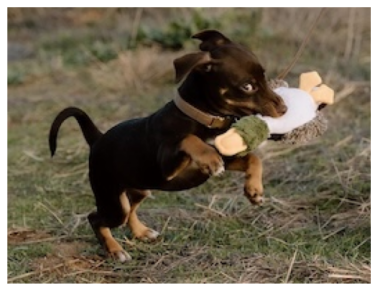

In [81]:
plt.imshow(img)
plt.axis('off');

### Applying a greyscale filter

One way to convert an image to greyscale is to average its red, green, and blue values.

In [82]:
mean_2d = img.mean(axis=2)
mean_2d

array([[0.32, 0.34, 0.35, ..., 0.43, 0.44, 0.44],
       [0.31, 0.35, 0.36, ..., 0.44, 0.45, 0.45],
       [0.3 , 0.33, 0.36, ..., 0.45, 0.46, 0.47],
       ...,
       [0.64, 0.64, 0.6 , ..., 0.49, 0.47, 0.47],
       [0.43, 0.35, 0.37, ..., 0.32, 0.48, 0.5 ],
       [0.31, 0.42, 0.49, ..., 0.07, 0.21, 0.34]])

This is just a single red channel!

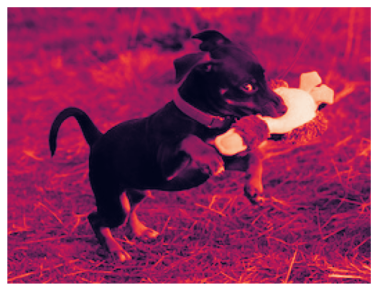

In [83]:
plt.imshow(mean_2d)
plt.axis('off');

We need to _repeat_ `mean_2d` three times along axis 2, to use the same values for the red, green, and blue channels. `np.repeat` will help us here.

In [84]:
# np.newaxis is an alias for None.
# It helps us introduce an additional axis.
np.arange(5)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [85]:
np.repeat(np.arange(5)[:, np.newaxis], 3, axis=1)

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [86]:
mean_3d = np.repeat(mean_2d[:, :, np.newaxis], 3, axis=2)

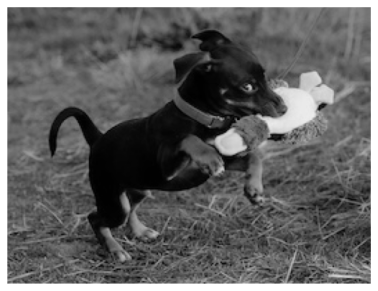

In [87]:
plt.imshow(mean_3d)
plt.axis('off');

### Applying a sepia filter

Let's sepia-fy Bentley!

<center>
<img src="imgs/apple-sepia.png" width=50%>
    <small>
(<a href="https://support.apple.com/guide/motion/sepia-filter-motn169f8c87/mac">Image credits</a>)</small>
</center>

From [here](https://stackoverflow.com/questions/1061093/how-is-a-sepia-tone-created), we can apply this conversion to each pixel.

$$\begin{align*}
R_{\text{sepia}} &= 0.393R + 0.769G + 0.189B \\ G_{\text{sepia}} &= 0.349R + 0.686G + 0.168B \\
B_{\text{sepia}} &= 0.272R + 0.534G + 0.131B\end{align*}$$

In [88]:
sepia_filter = np.array([
    [0.393, 0.769, 0.189],
    [0.349, 0.686, 0.168],
    [0.272, 0.534, 0.131]
])

In [89]:
# Multiplies each pixel by the sepia_filter matrix.
# Then, clips each RGB value to be between 0 and 1.
filtered = (img @ sepia_filter.T).clip(0, 1)
filtered

array([[[0.46, 0.41, 0.32],
        [0.48, 0.43, 0.33],
        [0.5 , 0.44, 0.35],
        ...,
        [0.6 , 0.53, 0.42],
        [0.6 , 0.54, 0.42],
        [0.61, 0.54, 0.42]],

       [[0.45, 0.4 , 0.31],
        [0.49, 0.43, 0.34],
        [0.5 , 0.45, 0.35],
        ...,
        [0.61, 0.54, 0.42],
        [0.62, 0.55, 0.43],
        [0.63, 0.56, 0.43]],

       [[0.43, 0.38, 0.3 ],
        [0.47, 0.42, 0.33],
        [0.51, 0.45, 0.35],
        ...,
        [0.63, 0.56, 0.44],
        [0.64, 0.57, 0.44],
        [0.64, 0.57, 0.45]],

       ...,

       [[0.88, 0.78, 0.61],
        [0.89, 0.79, 0.61],
        [0.84, 0.75, 0.58],
        ...,
        [0.68, 0.61, 0.47],
        [0.65, 0.58, 0.45],
        [0.65, 0.58, 0.45]],

       [[0.6 , 0.53, 0.42],
        [0.5 , 0.44, 0.35],
        [0.52, 0.46, 0.36],
        ...,
        [0.45, 0.4 , 0.31],
        [0.66, 0.59, 0.46],
        [0.69, 0.62, 0.48]],

       [[0.45, 0.4 , 0.31],
        [0.59, 0.53, 0.41],
        [0.69, 0

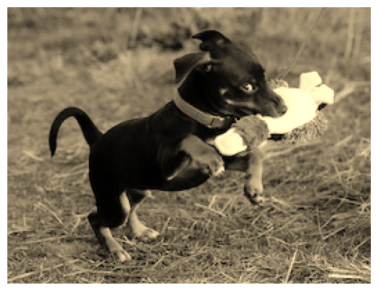

In [90]:
plt.imshow(filtered)
plt.axis('off');

### Key takeaway: avoid `for`-loops whenever possible!

You can do a lot without `for`-loops, both in `numpy` and in `pandas`.

## `pandas` and `numpy`

<center><img src='imgs/python-stack.png' width=60%></center>

### `pandas` is built upon `numpy`!

- A Series in `pandas` is a `numpy` array with an index.
- A DataFrame is like a dictionary of columns, each of which is a `numpy` array.
- Many operations in `pandas` are fast because they use `numpy`'s implementations.
- If you need to access the array underlying a DataFrame or Series, use the `to_numpy` method.

In [91]:
dog_path = Path('data') / 'dogs43.csv'
dogs = pd.read_csv(dog_path)
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [92]:
dogs['lifetime_cost']

0     22589.0
1     21992.0
2     18993.0
       ...   
40    13936.0
41    13581.0
42    20022.0
Name: lifetime_cost, Length: 43, dtype: float64

In [93]:
dogs['lifetime_cost'].to_numpy()

array([22589., 21992., 18993., ..., 13936., 13581., 20022.])

### `pandas` data types

- Each Series (column) has a `numpy` data type, which refers to the type of the values stored within. Access it using the `dtypes` attribute.
- A column's data type determines which operations can be applied to it.
- `pandas` tries to guess the correct data types for a given DataFrame, and is often wrong.
    - This can lead to incorrect calculations and poor memory/time performance.
- As a result, you will often need to explicitly convert between data types.

In [94]:
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [95]:
dogs.dtypes

breed             object
kind              object
lifetime_cost    float64
longevity        float64
size              object
weight           float64
height           float64
dtype: object

### `pandas` data types

Notice that Python `str` types are `object` types in `numpy` and `pandas`.

|Pandas dtype|Python type|NumPy type|SQL type|Usage|
|---|---|---|---|---|
|int64|int|int_, int8,...,int64, uint8,...,uint64|INT, BIGINT| Integer numbers|
|float64|float|float_, float16, float32, float64|FLOAT| Floating point numbers|
|bool|bool|bool_|BOOL|True/False values|
|datetime64 or Timestamp|datetime.datetime|datetime64|DATETIME|Date and time values|
|timedelta64 or Timedelta|datetime.timedelta|timedelta64|NA|Differences between two datetimes|
|category|NA|NA|ENUM|Finite list of text values|
|object|str|string, unicode|NA|Text|
|object|NA|object|NA|Mixed types|

[This article](https://www.dataquest.io/blog/pandas-big-data/) details how `pandas` stores different data types under the hood.

[This article](https://mortada.net/can-integer-operations-overflow-in-python.html#Can-integers-overflow-in-python?) explains how `numpy`/`pandas` `int64` operations differ from vanilla `int` operations.

### Type conversion

You can change the data type of a Series using the `.astype` Series method.

For example, we can change the data type of the `'lifetime_cost'` column in `dogs` to be `uint32`:

In [96]:
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [97]:
# Gives the types as well as the space taken up by the DataFrame.
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   breed          43 non-null     object 
 1   kind           43 non-null     object 
 2   lifetime_cost  43 non-null     float64
 3   longevity      43 non-null     float64
 4   size           43 non-null     object 
 5   weight         43 non-null     float64
 6   height         43 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.5+ KB


In [98]:
dogs = dogs.assign(lifetime_cost=dogs['lifetime_cost'].astype('uint32'))

Now, the DataFrame takes up less space! This may be insignificant in our DataFrame, but makes a difference when working with larger datasets.

In [99]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   breed          43 non-null     object 
 1   kind           43 non-null     object 
 2   lifetime_cost  43 non-null     uint32 
 3   longevity      43 non-null     float64
 4   size           43 non-null     object 
 5   weight         43 non-null     float64
 6   height         43 non-null     float64
dtypes: float64(3), object(3), uint32(1)
memory usage: 2.3+ KB


### 💡 Pro-Tip: Setting `dtype`s in `read_csv`

Usually, we prefer to set the correct dtypes in `read_csv`, since it can help `pandas` load in files more quickly:

In [100]:
dog_path

PosixPath('data/dogs43.csv')

In [101]:
dogs = pd.read_csv(dog_path, dtype={'lifetime_cost': 'uint32'})
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936,7.57,large,115.0,25.5
41,Mastiff,working,13581,6.50,large,175.0,30.0
42,Saint Bernard,working,20022,7.78,large,155.0,26.5


In [102]:
dogs.dtypes

breed             object
kind              object
lifetime_cost     uint32
longevity        float64
size              object
weight           float64
height           float64
dtype: object

### Axes

- The rows and columns of a DataFrame are both stored as Series.
- The **axis** specifies the direction of a **slice** of a DataFrame.

<center><img src='imgs/axis.png' width=30%></center>

- Axis 0 refers to the index (rows).
- Axis 1 refers to the columns.
- **These are the same axes definitions that 2D `numpy` arrays have!**

### DataFrame methods with `axis`

- Many Series methods work on DataFrames.
- In such cases, the DataFrame method usually applies the Series method to every row or column.
- Many of these methods accept an `axis` argument; the default is usually `axis=0`.

In [103]:
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936,7.57,large,115.0,25.5
41,Mastiff,working,13581,6.50,large,175.0,30.0
42,Saint Bernard,working,20022,7.78,large,155.0,26.5


In [104]:
# Max element in each column.
dogs.max()

breed            Tibetan Terrier
kind                     working
lifetime_cost              26686
longevity                   16.5
size                       small
weight                     175.0
height                      30.0
dtype: object

In [105]:
# Max element in each row – throws an error since there are different types in each row.
# dogs.max(axis=1)

In [106]:
# The number of unique values in each column.
dogs.nunique()

breed            43
kind              7
lifetime_cost    43
longevity        40
size              3
weight           37
height           30
dtype: int64

In [107]:
# describe doesn't accept an axis argument; it works on every numeric column in the DataFrame it is called on.
dogs.describe()

,lifetime_cost,longevity,weight,height
count,43.00,43.00,43.00,43.00
mean,20532.84,11.34,49.35,18.34
std,3290.78,2.05,39.42,6.83
...,...,...,...,...
50%,21006.00,11.81,36.50,18.50
75%,22072.50,12.52,67.50,25.00
max,26686.00,16.50,175.00,30.00


<div class="alert alert-success">
<h3>Exercise</h3>
Pick a dog breed that you personally like or know the name of. Then:
<ul>
    <li>Try to find a few other dog breeds that are similar in weight to yours in <code>all_dogs</code>.</li>
    <li>Which similar breeds have the lowest and highest <code>'lifetime_cost'</code>? <code>'intelligence_rank'</code>?</li>
    <li>Are there any similar breeds that you haven't heard of before?</li>
</ul>
<br>
    For fun, look up these dog breeds on the <a href="https://www.akc.org/">AKC website</a> to see what they look like!
</div>

<!-- As a bonus, look up these dog breeds on the [AKC website](https://www.akc.org/) to see how they look! -->

In [108]:
all_dogs = pd.read_csv(Path('data') / 'all_dogs.csv')
all_dogs

,breed,group,datadog,popularity_all,...,megarank,size,weight,height
0,Border Collie,herding,3.64,45,...,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,...,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,...,11.0,medium,35.0,19.0
...,...,...,...,...,...,...,...,...,...
169,Wire Fox Terrier,terrier,NaN,100,...,NaN,small,17.5,15.0
170,Wirehaired Pointing Griffon,sporting,NaN,92,...,NaN,medium,NaN,22.0
171,Xoloitzcuintli,non-sporting,NaN,155,...,NaN,medium,NaN,16.5


## Data granularity and the `groupby` method

### Example: Palmer Penguins

<center><img src="imgs/lter_penguins.png" width=60%>
<i><a href="https://github.com/allisonhorst/palmerpenguins/blob/main/README.md">Artwork by @allison_horst</a></i>

</center>

The dataset we'll work with for the rest of the lecture involves various measurements taken of three species of penguins in Antarctica.

In [109]:
IFrame('https://www.youtube-nocookie.com/embed/CCrNAHXUstU?si=-DntSyUNp5Kwitjm&amp;start=11',
       width=560, height=315)

In [110]:
import seaborn as sns
penguins = sns.load_dataset('penguins').dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
...,...,...,...,...,...,...,...
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


Here, each row corresponds to a single penguin, and each column corresponds to a different attribute (or feature) we have for each penguin. Data formatted in this way is called [tidy data](https://r4ds.had.co.nz/tidy-data.html).

### Granularity

- Granularity refers to what each observation in a dataset represents.
    - Fine: small details.
    - Coarse: bigger picture.

- If you can control how your dataset is created, you should opt for **finer granularity**, i.e. for more detail.
    - You can always remove details, but it's difficult to add detail that isn't already there.
    - But obtaining fine-grained data can take more time/money.

- Today, we'll focus on how to **remove** details from fine-grained data, in order to help us understand bigger-picture trends in our data.

### Aggregating

**Aggregating** is the act of combining many values into a single value.

- What is the mean `'body_mass_g'` for all penguins?

In [111]:
penguins['body_mass_g'].mean()

np.float64(4207.057057057057)

- What is the mean `'body_mass_g'` **for each species**?

In [112]:
# ???

### Naive approach: looping through unique values

In [113]:
species_map = pd.Series([], dtype=float)

for species in penguins['species'].unique():
    species_only = penguins.loc[penguins['species'] == species]
    species_map.loc[species] = species_only['body_mass_g'].mean()

species_map

Adelie       3706.16
Chinstrap    3733.09
Gentoo       5092.44
dtype: float64

- For each unique `'species'`, we make a pass through the entire dataset.
    - The asymptotic runtime of this procedure is $\Theta(ns)$, where $n$ is the number of rows and $s$ is the number of unique species.

- While there are other loop-based solutions that only involve a single pass over the DataFrame, we'd like to avoid Python loops entirely, as they're slow.

### Grouping

A better solution is to use the `groupby` method.

In [114]:
# Before:
penguins['body_mass_g'].mean()

np.float64(4207.057057057057)

In [115]:
# After:
penguins.groupby('species')['body_mass_g'].mean()

species
Adelie       3706.16
Chinstrap    3733.09
Gentoo       5092.44
Name: body_mass_g, dtype: float64

Somehow, the `groupby` method computes what we're looking for in just one line. How?

In [116]:
%%pt

penguins.groupby('species')['body_mass_g'].mean()

/Users/sam/repos/dsc80/private/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:2565: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  result = fn(*args, **kwargs)
/Users/sam/repos/dsc80/private/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:2565: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  result = fn(*args, **kwargs)
/Users/sam/repos/dsc80/private/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:2565: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  result = fn(*args, **kwargs)


### "Split-apply-combine" paradigm

The `groupby` method involves three steps: **split**, **apply**, and **combine**. This is the same terminology that the [`pandas` documentation](https://pandas.pydata.org/docs/user_guide/groupby.html) uses.

<center><img src="imgs/image_0.png" width=40%></center>

- **Split** breaks up and "groups" the rows of a DataFrame according to the specified **key**. There is one "group" for every unique value of the key.

- **Apply** uses a function (e.g. aggregation, transformation, filtration) within the individual groups.

- **Combine** stitches the results of these operations into an output DataFrame.

- The split-apply-combine pattern can be **parallelized** to work on multiple computers or threads, by sending computations for each group to different processors.

### More examples

Before we dive into the internals, let's look at a few more examples.

<div class="alert alert-warning">
    <h3>Question 🤔 </h3>


What proportion of penguins of each `'species'` live on `'Dream'` island?
</div>
    
Your output should look like:
    
    species
    Adelie       0.38
    Chinstrap    1.00
    Gentoo       0.00

In [117]:
# Fill this in, then respond on dsc80.com/q

## `DataFrameGroupBy` objects and aggregation

### `DataFrameGroupBy` objects

We've just evaluated a few expressions of the following form.

In [118]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
...,...,...,...,...,...,...,...
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [119]:
penguins.groupby('species')['bill_length_mm'].mean()

species
Adelie       38.82
Chinstrap    48.83
Gentoo       47.57
Name: bill_length_mm, dtype: float64

There are two method calls in the expression above: `.groupby('species')` and `.mean()`. What happens in the `.groupby()` call?

In [120]:
penguins.groupby('species')

### Peeking under the hood

If `df` is a DataFrame, then `df.groupby(key)` returns a `DataFrameGroupBy` object.

This object represents the "split" in "split-apply-combine".

In [121]:
# Simplified DataFrame for demonstration:
penguins_small = penguins.iloc[[0, 150, 300, 1, 251, 151, 301], [0, 5, 6]]
penguins_small

,species,body_mass_g,sex
0,Adelie,3750.0,Male
156,Chinstrap,3725.0,Male
308,Gentoo,4875.0,Female
1,Adelie,3800.0,Female
258,Gentoo,4350.0,Female
157,Chinstrap,3950.0,Female
309,Gentoo,5550.0,Male


In [122]:
# Creates one group for each unique value in the species column.
penguin_groups = penguins_small.groupby('species')
penguin_groups

In [123]:
%%pt
penguin_groups

/Users/sam/repos/dsc80/private/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:2565: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  result = fn(*args, **kwargs)


`DataFrameGroupBy` objects have a `groups` attribute, which is a dictionary in which the keys are group names and the values are lists of row labels.

In [124]:
penguin_groups.groups

{'Adelie': [0, 1], 'Chinstrap': [156, 157], 'Gentoo': [308, 258, 309]}

`DataFrameGroupBy` objects also have a `get_group(key)` method, which returns a DataFrame with only the values for the given key.

In [125]:
penguin_groups.get_group('Chinstrap')

,species,body_mass_g,sex
156,Chinstrap,3725.0,Male
157,Chinstrap,3950.0,Female


In [126]:
# Same as the above!
penguins_small.query('species == "Chinstrap"')

,species,body_mass_g,sex
156,Chinstrap,3725.0,Male
157,Chinstrap,3950.0,Female


We usually don't use these attributes and methods, but they're useful in understanding how `groupby` works under the hood.

### Aggregation

- Once we create a `DataFrameGroupBy` object, we need to **apply** some function to each group, and **combine** the results.

- The most common operation we apply to each group is an **aggregation**.
    - Remember, aggregation is the act of combining many values into a single value.
- To perform an aggregation, use an aggregation method on the `DataFrameGroupBy` object, e.g. `.mean()`, `.max()`, or `.median()`.

Let's look at some examples.

In [127]:
penguins_small

,species,body_mass_g,sex
0,Adelie,3750.0,Male
156,Chinstrap,3725.0,Male
308,Gentoo,4875.0,Female
1,Adelie,3800.0,Female
258,Gentoo,4350.0,Female
157,Chinstrap,3950.0,Female
309,Gentoo,5550.0,Male


In [128]:
penguins_small.groupby('species')['body_mass_g'].mean()

species
Adelie       3775.0
Chinstrap    3837.5
Gentoo       4925.0
Name: body_mass_g, dtype: float64

In [129]:
# Whoa, what happened in the sex column?
penguins_small.groupby('species').sum()

,body_mass_g,sex
species,,
Adelie,7550.0,MaleFemale
Chinstrap,7675.0,MaleFemale
Gentoo,14775.0,FemaleFemaleMale


In [130]:
penguins_small.groupby('species').last()

,body_mass_g,sex
species,,
Adelie,3800.0,Female
Chinstrap,3950.0,Female
Gentoo,5550.0,Male


In [131]:
penguins_small.groupby('species').max()

,body_mass_g,sex
species,,
Adelie,3800.0,Male
Chinstrap,3950.0,Male
Gentoo,5550.0,Male


### Column independence

Within each group, the aggregation method is applied to **each column independently**.

In [132]:
penguins_small.groupby('species').max()

,body_mass_g,sex
species,,
Adelie,3800.0,Male
Chinstrap,3950.0,Male
Gentoo,5550.0,Male


It **is not** telling us that there is a `'Male'` `'Adelie'` penguin with a `'body_mass_g'` of `3800.0`!

In [133]:
# This penguin is Female!
penguins_small.loc[(penguins['species'] == 'Adelie') & (penguins['body_mass_g'] == 3800.0)]

,species,body_mass_g,sex
1,Adelie,3800.0,Female


<div class="alert alert-warning">
    <h3>Question 🤔 </h3>


Find the `species`, `island`, and `body_mass_g` of the heaviest `Male` and `Female` penguins in `penguins` (not `penguins_small`).
</div>

In [134]:
# Your code goes here.

### Column selection and performance implications

- By default, the aggregator will be applied to **all** columns that it can be applied to.
    - `max`, `min`, and `sum` are defined on strings, while `median` and `mean` are not.

- If we only care about one column, we can select that column before aggregating **to save time**.
    - `DataFrameGroupBy` objects support `[]` notation, just like `DataFrame`s.

In [135]:
# Back to the big penguins dataset!
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
...,...,...,...,...,...,...,...
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [136]:
# Works, but involves wasted effort since the other columns had to be aggregated for no reason.
penguins.groupby('species').sum()['bill_length_mm']

species
Adelie       5668.3
Chinstrap    3320.7
Gentoo       5660.6
Name: bill_length_mm, dtype: float64

In [137]:
# This is a SeriesGroupBy object!
penguins.groupby('species')['bill_length_mm']

In [138]:
# Saves time!
penguins.groupby('species')['bill_length_mm'].sum()

species
Adelie       5668.3
Chinstrap    3320.7
Gentoo       5660.6
Name: bill_length_mm, dtype: float64

To demonstrate that the former is slower than the latter, we can use `%%timeit`. For reference, we'll also include our earlier `for`-loop-based solution.

In [139]:
%%timeit
penguins.groupby('species').sum()['bill_length_mm']

251 μs ± 2.72 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [140]:
%%timeit
penguins.groupby('species')['bill_length_mm'].sum()

82.3 μs ± 1.63 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [141]:
%%timeit
species_map = pd.Series([], dtype=float)

for species in penguins['species'].unique():
    species_only = penguins.loc[penguins['species'] == species]
    species_map.loc[species] = species_only['body_mass_g'].mean()

species_map

603 μs ± 8.79 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Takeaways

- It's important to understand _what_ each piece of your code evaluates to – in the first two timed examples, the code is almost identical, but the performance is quite different.

    ```py
    # Slower
    penguins.groupby('species').sum()['bill_length_mm']

    # Faster
    penguins.groupby('species')['bill_length_mm'].sum()
    ```

- The `groupby` method is much quicker than `for`-looping over the DataFrame in Python. It can often produce results using just a **single, fast pass** over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
- You should **always** select the columns you want after `groupby`, unless you really know what you're doing!

## Beyond default aggregation methods

- There are many built-in aggregation methods.
- What if you want to apply different aggregation methods to different columns?
- What if the aggregation method you want to use doesn't already exist in `pandas`?

### The `aggregate` method

- The `DataFrameGroupBy` object has a general `aggregate` method, which aggregates using one or more operations.
    - Remember, aggregation is the act of combining many values into a single value.
- There are many ways of using `aggregate`; refer to [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) for a comprehensive list.
- Example arguments:
    - A single function.
    - A list of functions.
    - A dictionary mapping column names to functions.
- Per [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html), `agg` is an alias for `aggregate`.

### Example

How many penguins are there of each `'species'`, and what is the mean `'body_mass_g'` of each `'species'`?

In [142]:
(penguins
 .groupby('species')
 ['body_mass_g']
 .aggregate(['count', 'mean'])
)

,count,mean
species,,
Adelie,146,3706.16
Chinstrap,68,3733.09
Gentoo,119,5092.44


### Example

What is the maximum `'bill_length_mm'` of each `'species'`, and which `'island'`s is each `'species'` found on?

In [143]:
(penguins
 .groupby('species')
 .aggregate({'bill_length_mm': 'max', 'island': 'unique'})
)

,bill_length_mm,island
species,,
Adelie,46.0,"[Torgersen, Biscoe, Dream]"
Chinstrap,58.0,[Dream]
Gentoo,59.6,[Biscoe]


### Example

What is the **interquartile range** of the `'body_mass_g'` of each `'species'`?

In [144]:
# Here, the argument to agg is a function,
# which takes in a pd.Series and returns a scalar.

def iqr(s):
    return np.percentile(s, 75) - np.percentile(s, 25)

(penguins
 .groupby('species')
 ['body_mass_g']
 .agg(iqr)
)

species
Adelie       637.5
Chinstrap    462.5
Gentoo       800.0
Name: body_mass_g, dtype: float64